In [1]:
%matplotlib widget
import numpy as np                  # This is the standard way of importing numpy
import matplotlib.pyplot as plt     # and this is the usual way to load matplotlib
import pandas as pd                 # Pandas is convenient for tabular data
from matplotlib.animation import FuncAnimation
import itertools
from functools import total_ordering
try:
    from rich.progress import track
except:
    track = lambda x: x

In [2]:
@total_ordering #allows us to only implement lt and eq, imply gt, etc.
class Disk:
    def __init__(self, x:np.ndarray, v:np.ndarray, mass:float, radius:float, 
                 charge:float):
        self.mass = mass
        self.radius = radius
        self.x = np.asarray(x) #x example: array([2, 4, 6)
        self.v = np.asarray(v) #v example: array([1, -1, 1])
        self.nDim = len(self.x)
        if self.nDim != len(self.v):
            raise Exception("Dimensions of velocity and position lists do not match.")
        self.charge = charge
    
    
    def advance(self, t:float, L, F=None):
        # apply old velocity (update position)
        self.x += self.v * t
        self.x = self.x % L
        
        if F: # apply force (update velocity)
            # TODO: update self.v
            pass
    
    #allowing comparisons between disk
    def __lt__(self, other):
        return self.x[0] < other.x[0]
    
    def __eq__(self, other):
        return self.x[0] == other.x[0]
    
    @property
    def speed(self):
        return np.linalg.norm(self.v)
    
    @property
    def KE(self):
        return (1/2)*self.mass*(self.speed**2)


In [20]:
class Expt:
    def __init__(self, pPositions:list, pVelocities:list, pMass:float=3, pRadius:float=0.5, 
                 pCharge:float=1, dt:float=0.1, tmax:float=15, L:float=20):
        # pPositions example: [ [1, 3], [2, 2] ]: two particles, at (1,3) and (2,2)
        
        # set time variables
        self.t = 0
        self.tmax = tmax
        self.dt = dt
        
        # make the particle list
        self.numParticles = len(pPositions)
                
        if len(pVelocities) != self.numParticles:
            raise Exception("number of particles mismatched between position and velocity lists")
        
        self.particles = [Disk(x=pPositions[i], v=pVelocities[i],mass=pMass,radius=pRadius, charge=pCharge)
                          for i in range(self.numParticles)]
        
        self.nDim = self.particles[0].nDim
        
        #make the box bounds
        self.L = L
        
    def nextFrame(self):
        for p in self.particles: 
            p.advance(self.dt, self.L)
        self.t += dt
    
    @property
    def totalKE(self):
        return sum(p.KE for p in self.particles)
    
    @property
    def avgKE(self):
        return self.totalKE / self.numParticles
    
    #TODO: implement animation. For inspiration, we might use the "Relaxation method" code?
    #that seems like it would work well, but IDK yet. TODO TODO FIXME
    
    def showAnimation(self):
        fig, ax = plt.subplots()              # create the figure
        ax.set_xlim(0,self.L)              # and adjust axes limits and labels
        ax.set_ylim(0,self.L)
        ax.set_axis_off()
        xvar = np.linspace(-1,1,1001)            # set the time values to use
        line, = ax.plot(xvar,np.zeros_like(xvar), 'o')   # create the trace, saving in a variable
                                              # Note the comma; the ax.plot call returns a list

        def frame(n:int):
            y = np.zeros_like(xvar)              # initialize a vector of y values
            y += 0.5                          # start with the constant
            for i in range(1, n+1, 2):
                y -= 2 / (np.pi * i) * np.sin(2 * np.pi * i * xvar)
            line.set_ydata(y)                 # update the trace
            return line

        ani = FuncAnimation(fig, frame, range(1, 80, 2), interval=100, blit=True)
        ani.save("squarewave.gif", fps=10, dpi=100)
    
    #idea: makeCopy() function that makes an identical experiment - might be useful to
    #let us go to further times or something? idk
    

MovieWriter ffmpeg unavailable; using Pillow instead.


1.5


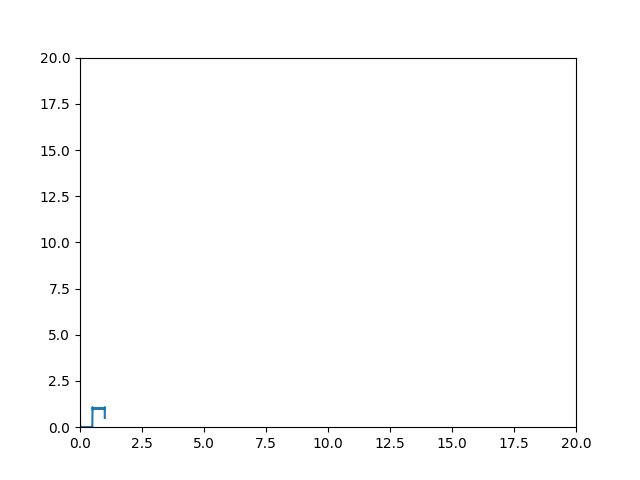

In [21]:
pPosGrid = list(itertools.product(np.linspace(1,5,5), np.linspace(1,5,5)))
pVelGrid = list(itertools.product(np.linspace(-1,1,5), np.linspace(-1,1,5)))

e1 = Expt(pPositions=pPosGrid,pVelocities = pVelGrid)

print(e1.avgKE)

e1.showAnimation()


In [9]:
plt.close("all")

In [12]:
np.zeros(4)

array([0., 0., 0., 0.])

In [ ]:
d = Disk([2, 2], [3, 3], 1, 1, 1)
d1 = Disk([3, 2], [3, 3], 1, 1, 1)

print(d < d1)
print(d == d1)
print(d > d1)


In [ ]:
#create and test an example disk
p = Disk([1,1], [6,8], 3, 2, 1)
print(p.speed)
print(p.KE)
print(p.x)
p.advance(2, 20)
print(p.speed)
print(p.KE)
print(p.x)
p.advance(1, 20)
print(p.speed)
print(p.KE)
print(p.x)